In [1]:
import cv2
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data_root = "dataset/A_Z Handwritten Data.csv"

In [3]:
dataset = pd.read_csv(data_root).astype("float32")
dataset.rename(columns={'0': "label"}, inplace=True)

In [4]:
letter_x = dataset.drop("label", axis=1)
letter_y = dataset["label"]
(digit_train_x, digit_train_y), (digit_test_x, digit_test_y) = mnist.load_data()

In [5]:
letter_x = letter_x.values

In [6]:
print(letter_x.shape, letter_y.shape)
print(digit_train_x.shape, digit_train_y.shape)
print(digit_test_x.shape, digit_test_y.shape)

(372450, 784) (372450,)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [7]:
digit_data = np.concatenate((digit_train_x, digit_test_x))
digit_target = np.concatenate((digit_train_y, digit_test_y))

print(digit_data.shape, digit_target.shape)

(70000, 28, 28) (70000,)


In [8]:
digit_target += 26

In [9]:
data = []

for flatten in letter_x:
  image = np.reshape(flatten, (28, 28, 1))
  data.append(image)

letter_data = np.array(data, dtype=np.float32)
letter_target = letter_y

In [10]:
digit_data = np.reshape(digit_data, (digit_data.shape[0], digit_data.shape[1], digit_data.shape[2], 1))

In [11]:
print(letter_data.shape, letter_target.shape)
print(digit_data.shape, digit_target.shape)

(372450, 28, 28, 1) (372450,)
(70000, 28, 28, 1) (70000,)


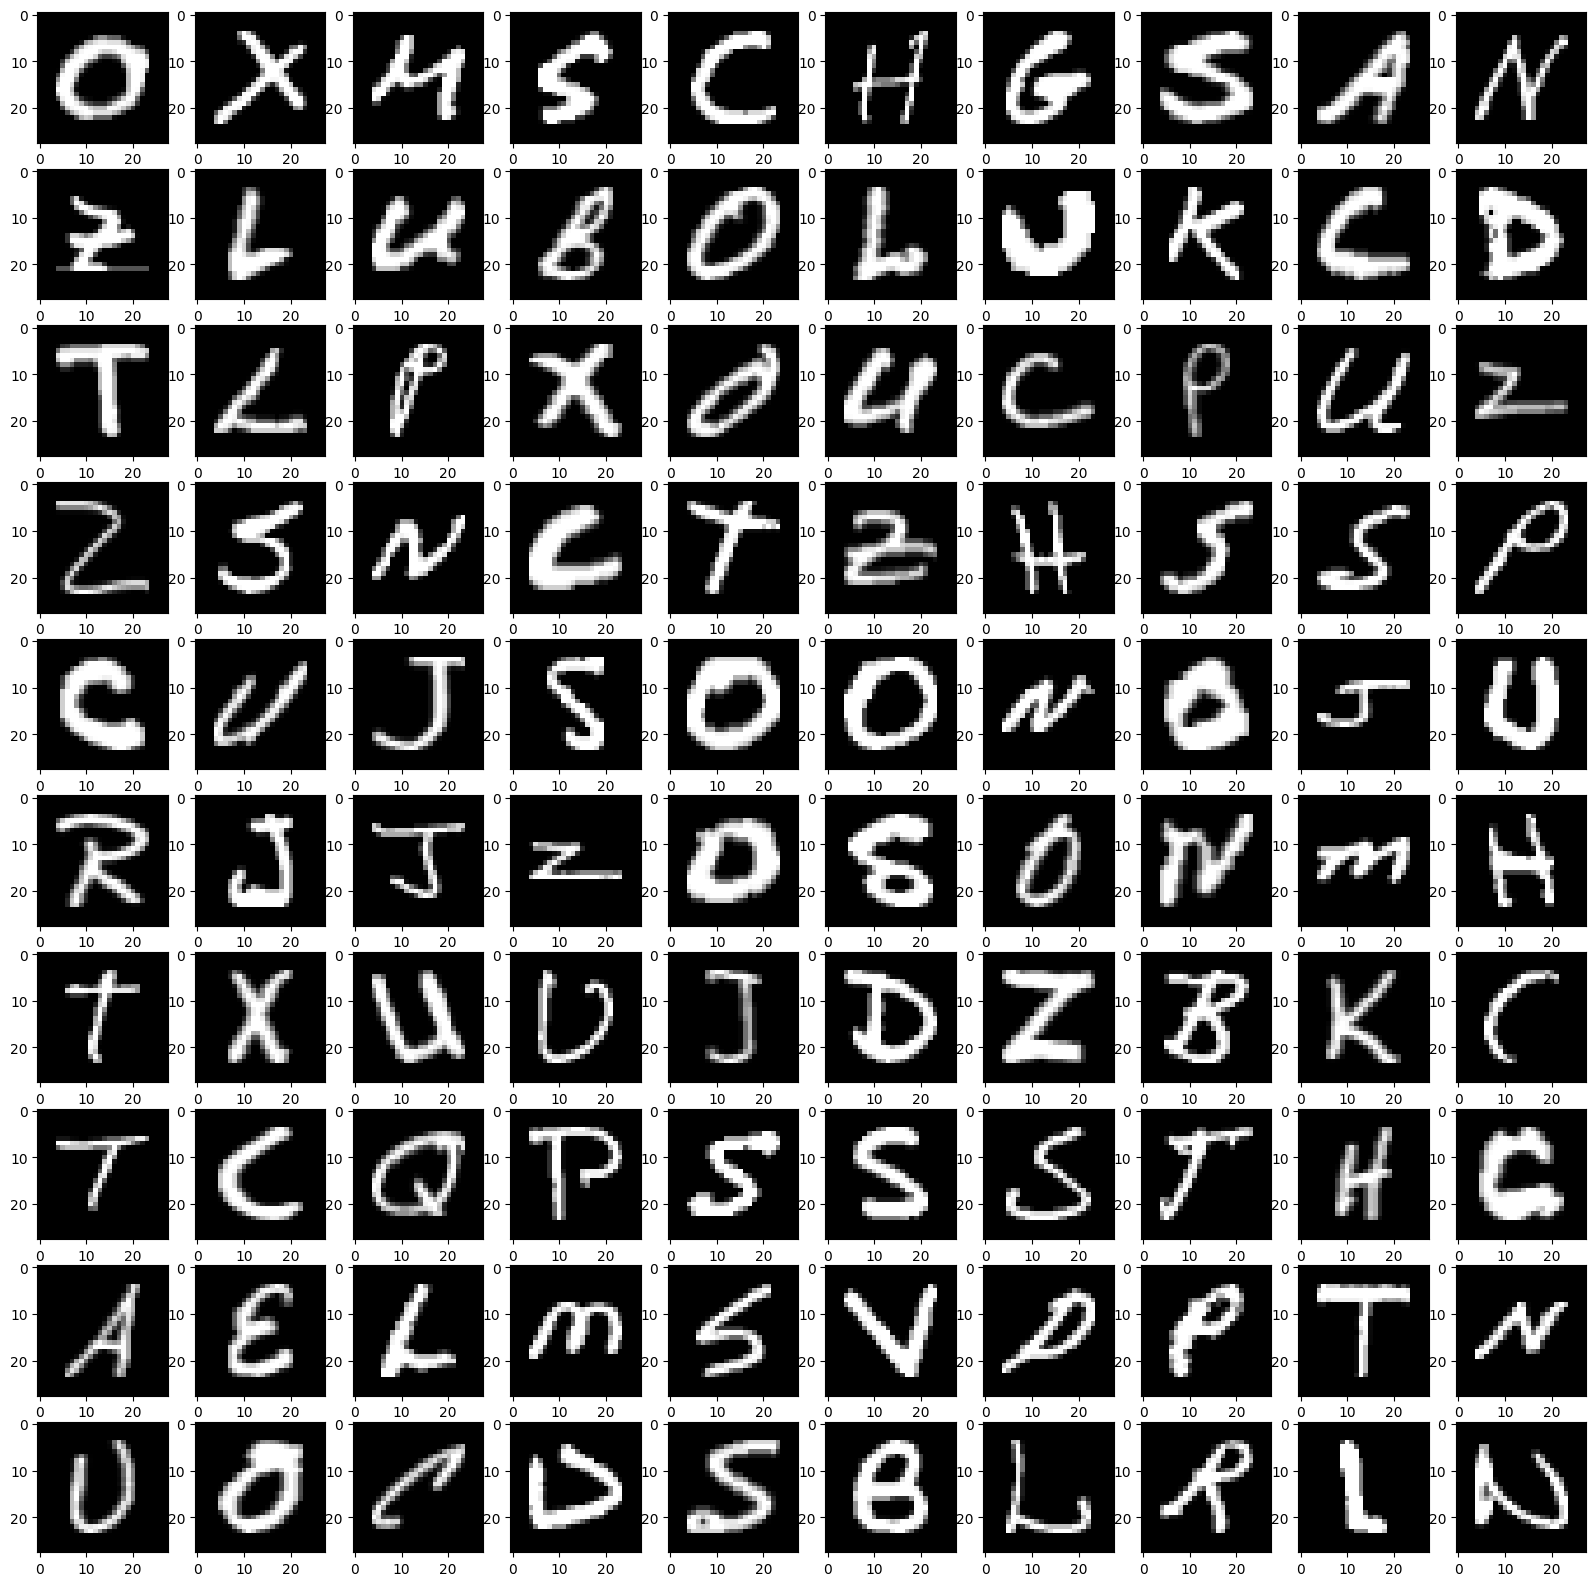

In [12]:
shuffled_data = shuffle(letter_data)
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(28, 28), interpolation="nearest", cmap="gray")

plt.show()

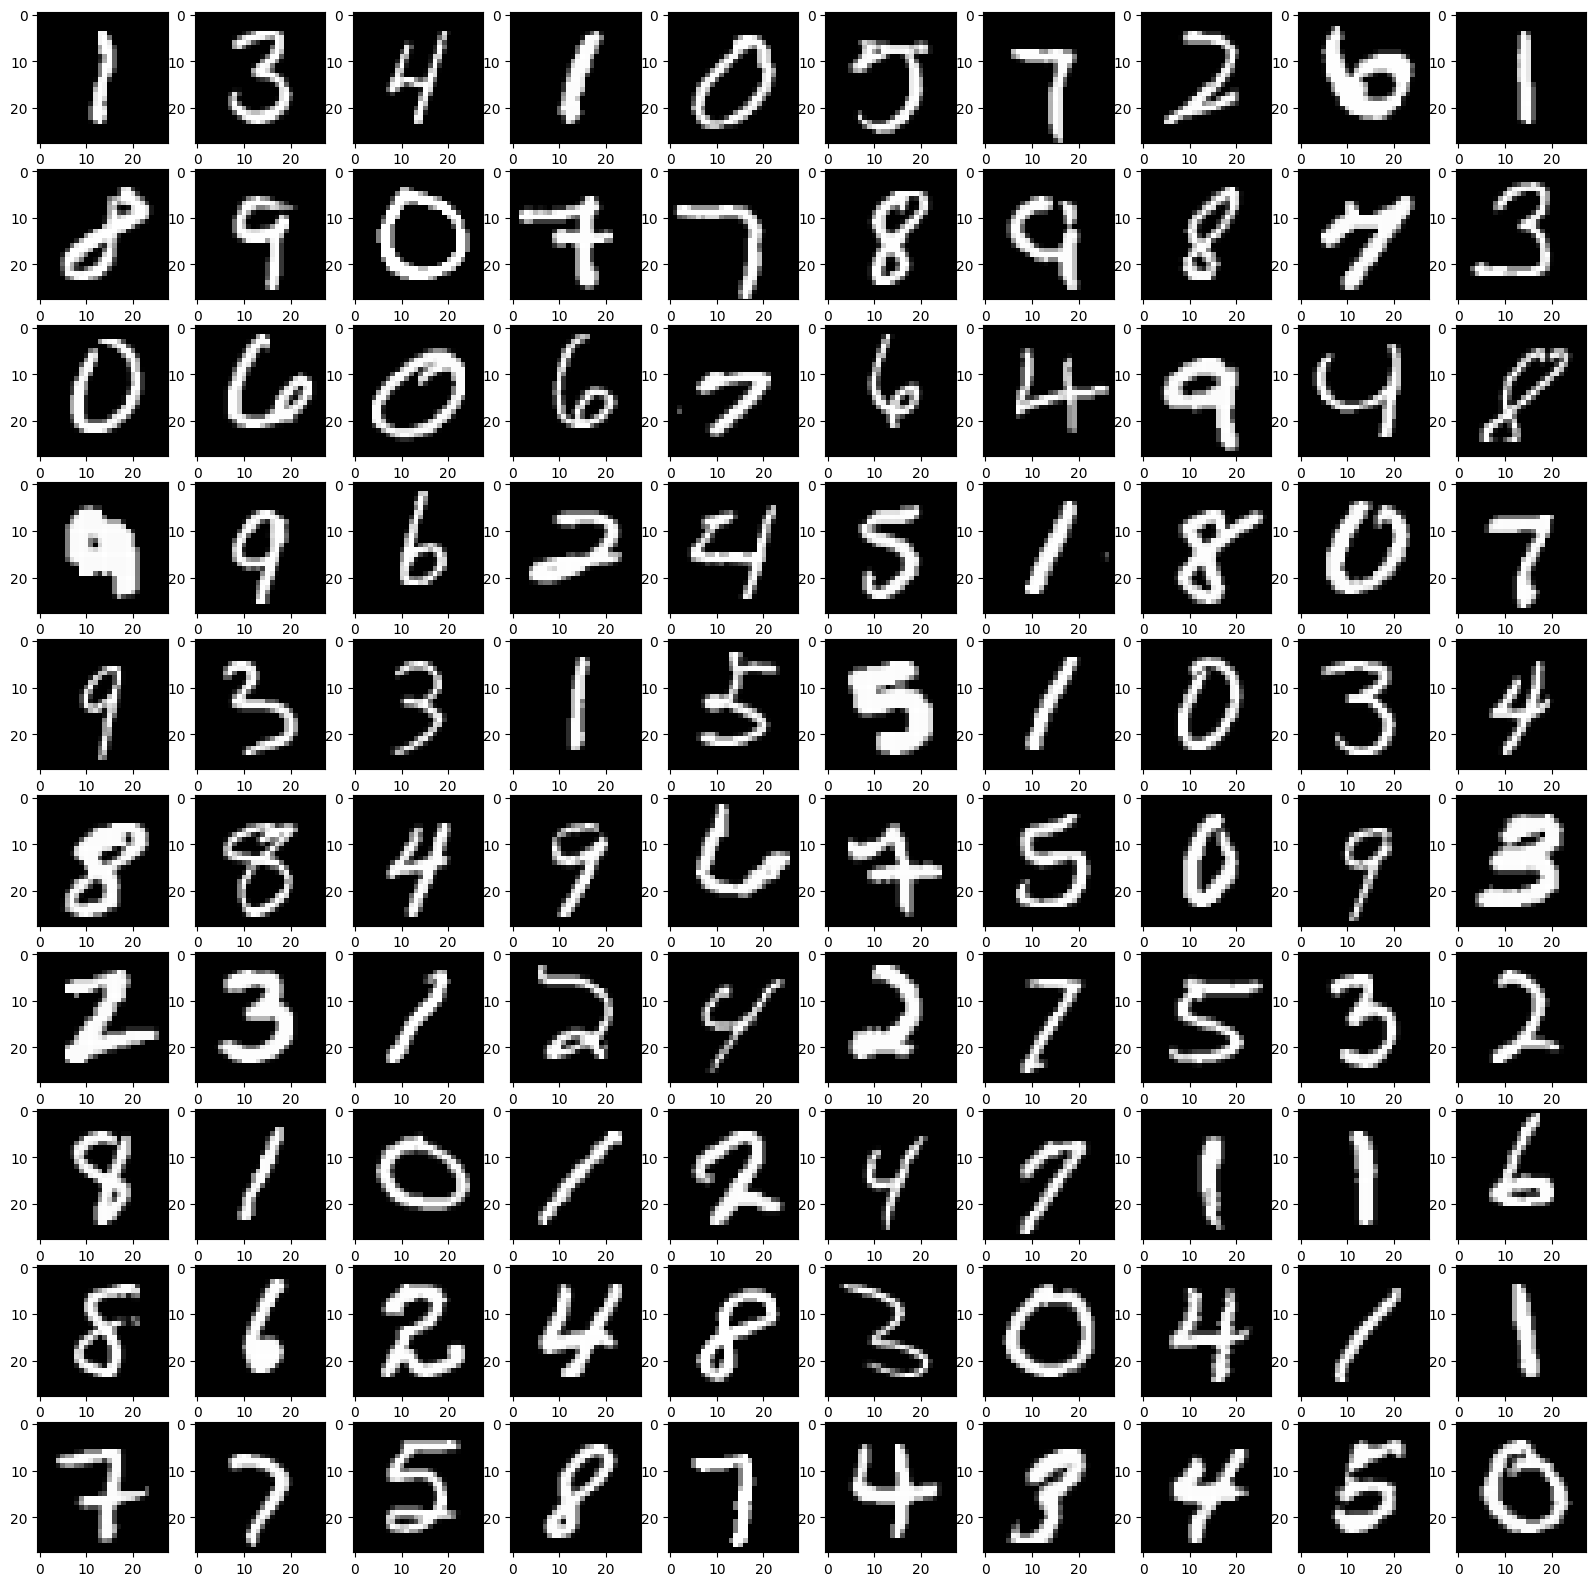

In [13]:
shuffled_data = shuffle(digit_data)
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(28, 28), interpolation="nearest", cmap="gray")

plt.show()

In [14]:
data = np.concatenate((digit_data, letter_data))
target = np.concatenate((digit_target, letter_target))

print(data.shape, target.shape)

(442450, 28, 28, 1) (442450,)


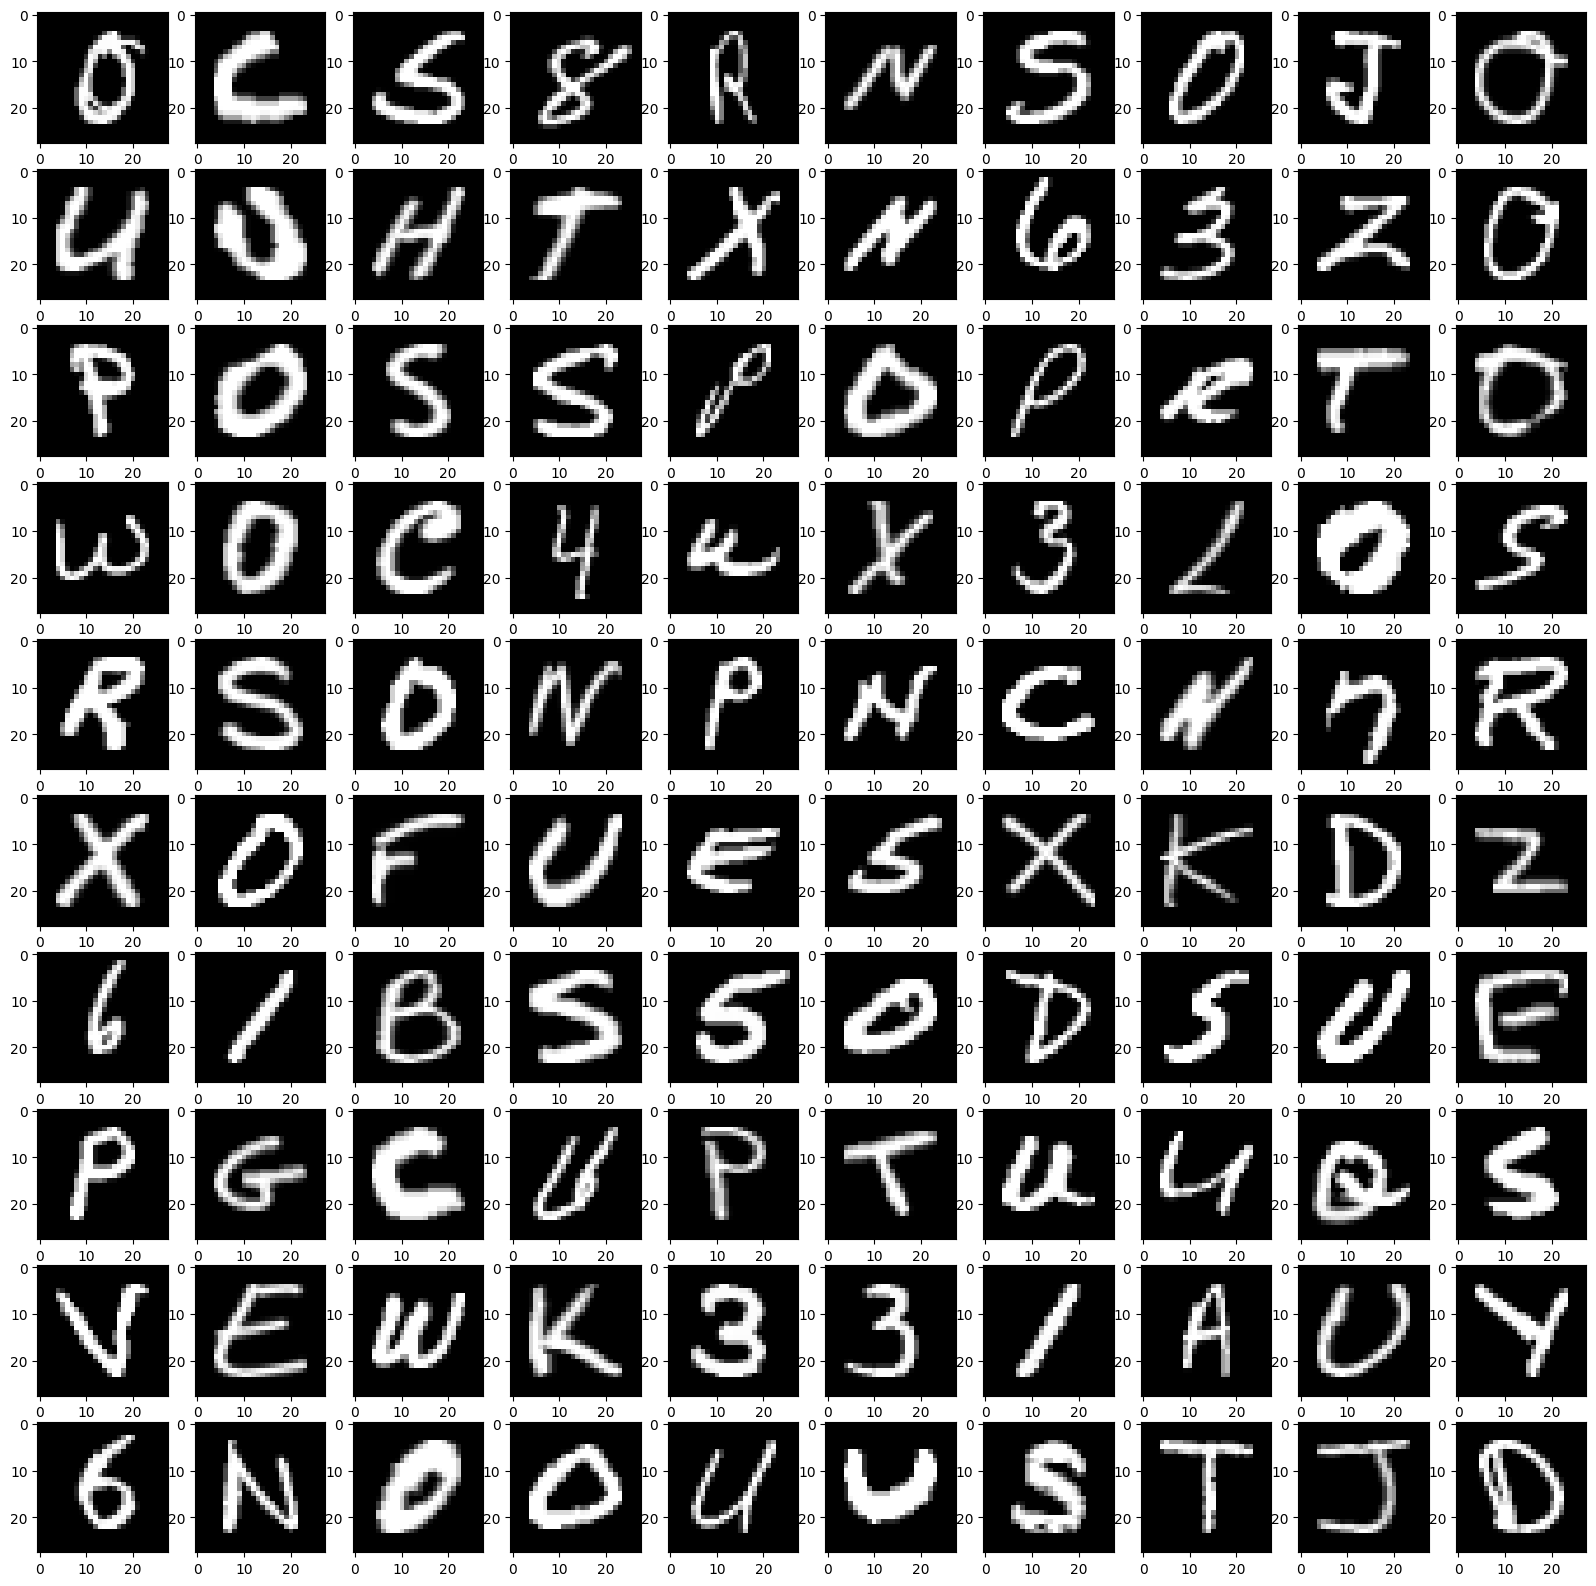

In [15]:
shuffled_data = shuffle(data)
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(28, 28), interpolation="nearest", cmap="gray")

plt.show()

In [16]:
train_data, test_data, train_labels, test_labels = train_test_split(data, target, test_size=0.2)

In [17]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(353960, 28, 28, 1) (353960,)
(88490, 28, 28, 1) (88490,)


In [18]:
train_data = train_data / 255.0
test_data = test_data / 255.0

train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)

train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], train_data.shape[2], 1))
test_data = np.reshape(test_data, (test_data.shape[0], test_data.shape[1], test_data.shape[2], 1))

In [19]:
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(353960, 28, 28, 1) (88490, 28, 28, 1)
(353960, 36) (88490, 36)


In [20]:
train_label_counts = [0 for i in range(36)]
test_label_counts = [0 for i in range(36)]

for i in range(train_data.shape[0]):
  train_label_counts[np.argmax(train_labels[i])] += 1

for i in range(test_data.shape[0]):
  test_label_counts[np.argmax(test_labels[i])] += 1

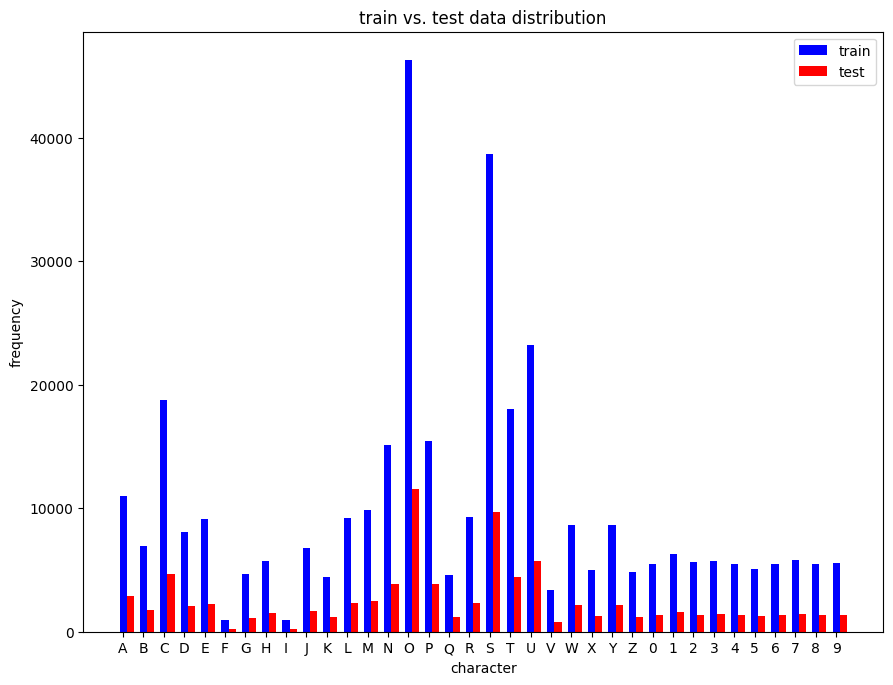

In [21]:
frequency = [
    train_label_counts, test_label_counts
] 

fig =  plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])
x = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.xticks(range(len(frequency[0])), x)
plt.title("train vs. test data distribution")
plt.xlabel("character")
plt.ylabel("frequency")

ax.bar(np.arange(len(frequency[0])), frequency[0], color="b", width=0.35)
ax.bar(np.arange(len(frequency[1])) + 0.35, frequency[1], color="r", width=0.35)
ax.legend(labels=["train", "test"])

In [22]:
np.save("content/numpy/train_data", train_data)
np.save("content/numpy/train_labels", train_labels)
np.save("content/numpy/test_data", test_data)
np.save("content/numpy/test_labels", test_labels)

In [23]:
import numpy as np
import visualkeras as vk # pip install visualkeras
import pandas as pd
import seaborn as sn
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [24]:
# !pip install seaborn


In [25]:
train_data = np.load("content/numpy/train_data.npy")
test_data = np.load("content/numpy/test_data.npy")
train_labels = np.load("content/numpy/train_labels.npy")
test_labels = np.load("content/numpy/test_labels.npy")

In [26]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(36, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 batch_normalization_1 (Batc  (None, 20, 20, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                        

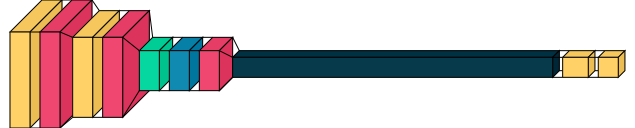

In [27]:
vk.layered_view(model)

In [28]:
best_loss_checkpoint = ModelCheckpoint(
    filepath="content/models/best_loss_model.h5",
    monitor="loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath="content/models/best_val_loss_model.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

In [29]:
history = model.fit(
    train_data,
    train_labels,
    validation_data=(test_data, test_labels), 
    epochs=10, 
    batch_size=200, 
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/10
1770/1770 [==============================] - 508s 285ms/step - loss: 0.1604 - accuracy: 0.9538 - val_loss: 0.0978 - val_accuracy: 0.9709
Epoch 2/10
1770/1770 [==============================] - 470s 265ms/step - loss: 0.0721 - accuracy: 0.9780 - val_loss: 0.0605 - val_accuracy: 0.9823
Epoch 3/10
1770/1770 [==============================] - 467s 264ms/step - loss: 0.0525 - accuracy: 0.9837 - val_loss: 0.0545 - val_accuracy: 0.9837
Epoch 4/10
1770/1770 [==============================] - 464s 262ms/step - loss: 0.0414 - accuracy: 0.9867 - val_loss: 0.0490 - val_accuracy: 0.9867
Epoch 5/10
1770/1770 [==============================] - 464s 262ms/step - loss: 0.0330 - accuracy: 0.9890 - val_loss: 0.0425 - val_accuracy: 0.9880
Epoch 6/10
1770/1770 [==============================] - 469s 265ms/step - loss: 0.0272 - accuracy: 0.9908 - val_loss: 0.0454 - val_accuracy: 0.9874
Epoch 7/10
1770/1770 [==============================] - 466s 263ms/step - loss: 0.0241 - accuracy: 0.9919 - val_

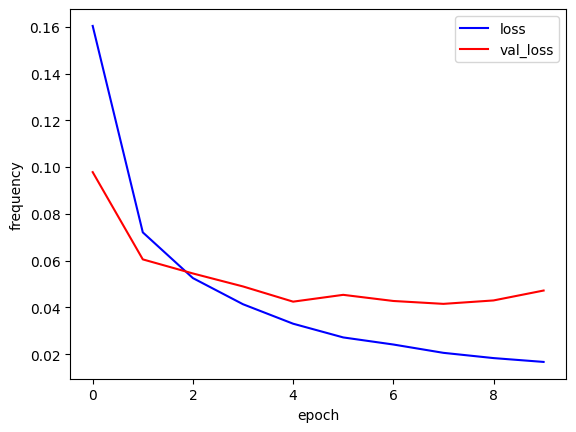

In [30]:
plt.plot(history.history["loss"], 'b', label="loss")
plt.plot(history.history["val_loss"], 'r', label="val_loss")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

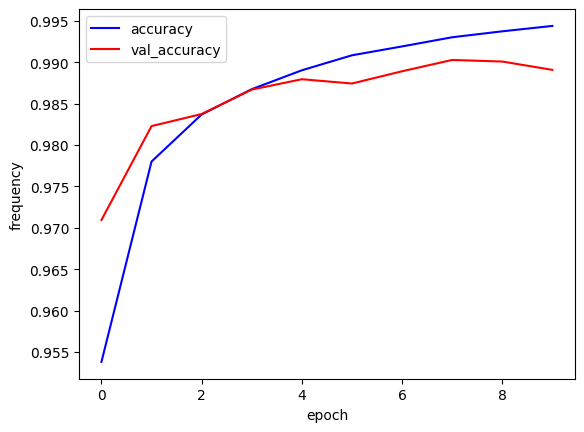

In [31]:
plt.plot(history.history["accuracy"], 'b', label="accuracy")
plt.plot(history.history["val_accuracy"], 'r', label="val_accuracy")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

In [32]:
model.load_weights("/content/models/best_val_loss_model.h5")

In [33]:
loss, acc = model.evaluate(test_data, test_labels)
print(loss, acc)

2766/2766 [==============================] - 21s 8ms/step - loss: 0.0415 - accuracy: 0.9903
0.041517529636621475 0.9902814030647278


In [34]:
predictions = model.predict(test_data)

2766/2766 [==============================] - 20s 7ms/step


In [35]:
confusion = confusion_matrix(
    np.argmax(test_labels, axis=1),
    np.argmax(predictions, axis=1)
)
print(confusion)

[[2891    0    0 ...    0    0    0]
 [   3 1729    0 ...    0    2    0]
 [   0    0 4628 ...    0    0    0]
 ...
 [   0    0    0 ... 1447    1    5]
 [   0    1    0 ...    0 1318    1]
 [   2    0    0 ...    5    3 1354]]


<Axes: xlabel='predicted', ylabel='actual'>

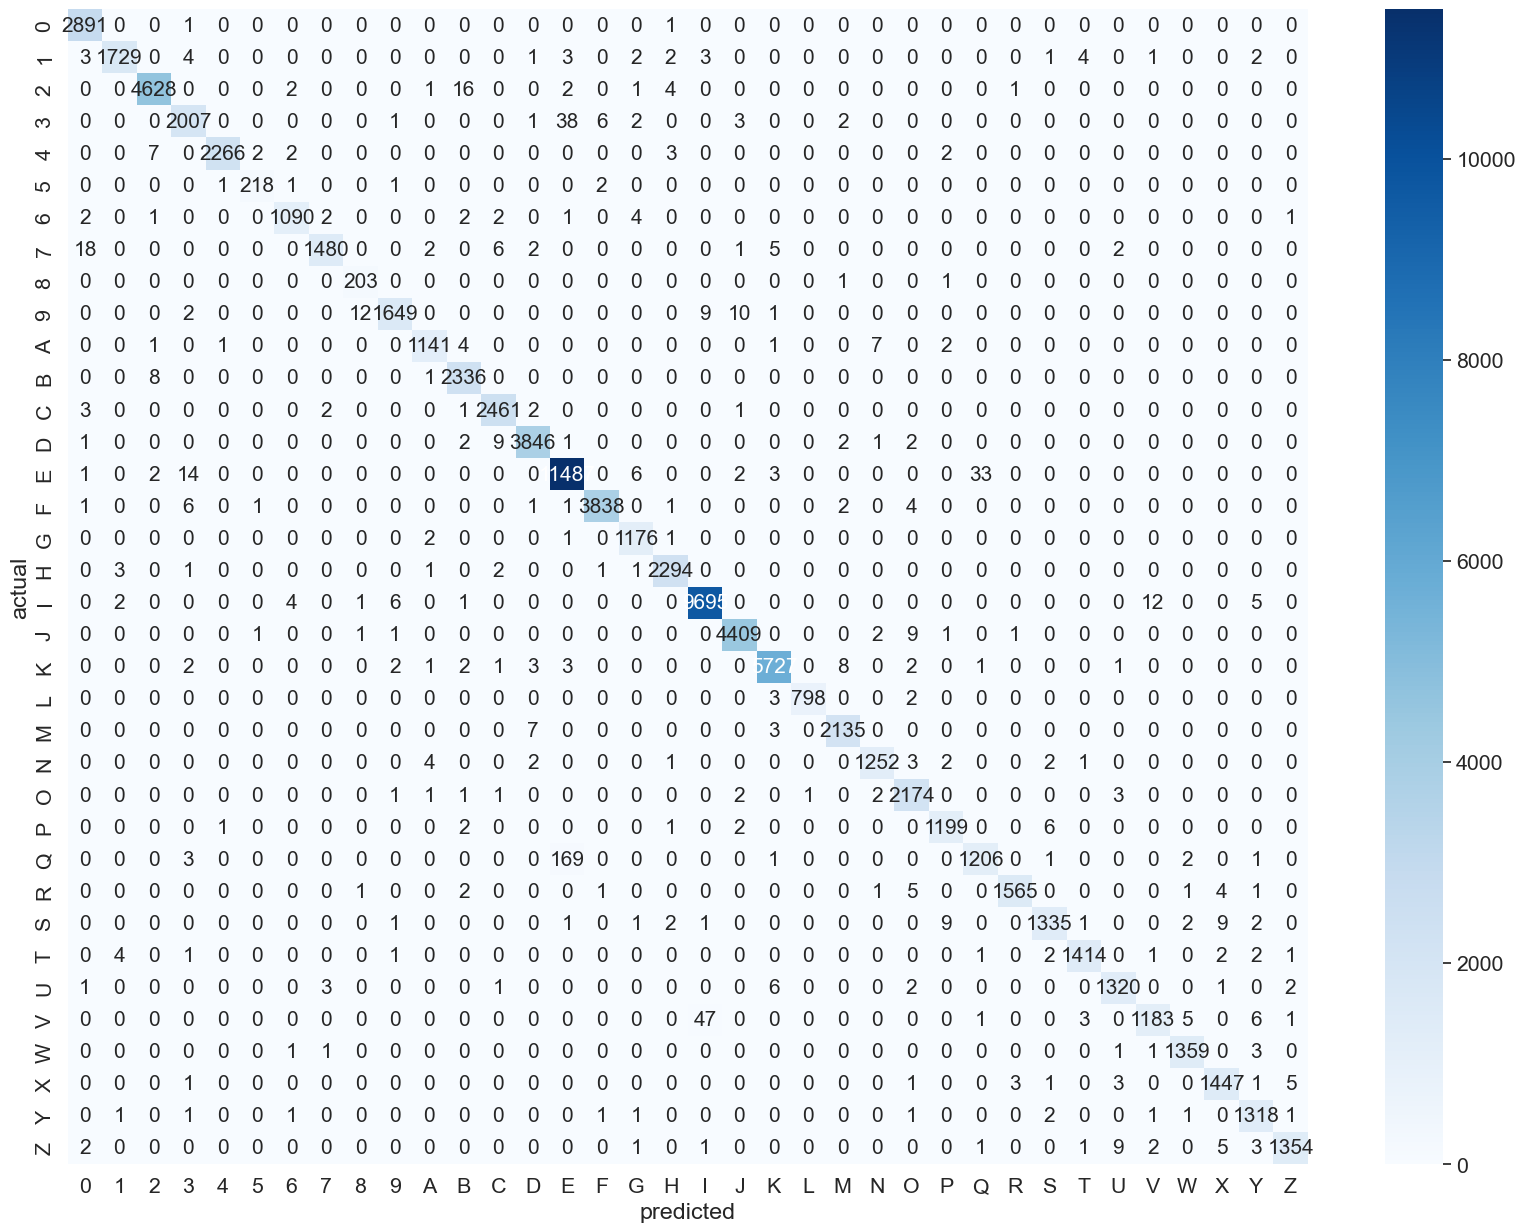

In [36]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (20,15))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt="d")

In [1]:
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [2]:
def clear_whiteboard(display):
    wb_x1, wb_x2, wb_y1, wb_y2 = whiteboard_region["x"][0], whiteboard_region["x"][1], whiteboard_region["y"][0], whiteboard_region["y"][1] 
    
    display[wb_y1-10:wb_y2+12, wb_x1-10:wb_x2+12] = (255, 255, 255)

In [3]:
def setup_display():
    title = np.zeros((80, 950, 3), dtype=np.uint8)
    board = np.zeros((600, 650, 3), dtype=np.uint8)
    panel = np.zeros((600, 300, 3), dtype=np.uint8)
    board[5:590, 8:645] = (255, 255, 255)
    
    board = cv2.rectangle(board, (8, 5), (645, 590), (255, 0, 0), 3)
    panel = cv2.rectangle(panel, (1, 4), (290, 590), (0, 255, 192), 2)
    panel = cv2.rectangle(panel, (22, 340), (268, 560), (255, 255, 255), 1)
    panel = cv2.rectangle(panel, (22, 65), (268, 280), (255, 255, 255), 1)
    
    cv2.line(panel, (145, 340), (145, 560), (255, 255, 255), 1)
    cv2.line(panel, (22, 380), (268, 380), (255, 255, 255), 1)
    
    cv2.putText(title, "       " +  window_name,(10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 255, 255), 2)
    cv2.putText(panel, "Action: ", (23, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)
    cv2.putText(panel, "Best Predictions", (52, 320), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 1)
    cv2.putText(panel, "Prediction", (42, 362), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    cv2.putText(panel, "Accuracy", (168, 362), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    cv2.putText(panel, actions[0], (95, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.6, action_colors[actions[0]], 1)

    display = np.concatenate((board, panel), axis=1)
    display = np.concatenate((title, display), axis=0)
    
    return display

In [4]:
def setup_panel(display):
    action_region_pt1, action_region_pt2 = status_regions["action"]
    preview_region_pt1, preview_region_pt2 = status_regions["preview"]
    label_region_pt1, label_region_pt2 = status_regions["labels"]
    acc_region_pt1, acc_region_pt2 = status_regions["accs"]
    
    display[action_region_pt1[1]:action_region_pt2[1], action_region_pt1[0]:action_region_pt2[0]] = (0, 0, 0)
    display[preview_region_pt1[1]:preview_region_pt2[1], preview_region_pt1[0]:preview_region_pt2[0]] = (0, 0, 0)
    display[label_region_pt1[1]:label_region_pt2[1], label_region_pt1[0]:label_region_pt2[0]] = (0, 0, 0)
    display[acc_region_pt1[1]:acc_region_pt2[1], acc_region_pt1[0]:acc_region_pt2[0]] = (0, 0, 0)
    
    if crop_preview is not None:
        display[preview_region_pt1[1]:preview_region_pt2[1], preview_region_pt1[0]:preview_region_pt2[0]] = cv2.resize(crop_preview, (crop_preview_h, crop_preview_w)) 
    
    if best_predictions:
        labels = list(best_predictions.keys())
        accs = list(best_predictions.values())
        prediction_status_cordinate = [
            ((725, 505), (830, 505), (0, 0, 255)),
            ((725, 562), (830, 562), (0, 255, 0)),
            ((725, 619), (830, 619), (255, 0, 0))
        ]
        for i in range(len(labels)):
            label_cordinate, acc_cordinate, color = prediction_status_cordinate[i]
            
            cv2.putText(display, labels[i], label_cordinate, cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
            cv2.putText(display, str(accs[i]), acc_cordinate, cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
        
        for i in range(len(labels), 3):
            label_cordinate, acc_cordinate, color = prediction_status_cordinate[i]
            
            cv2.putText(display, "_", label_cordinate, cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
            cv2.putText(display, "_", acc_cordinate, cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
    
    cv2.putText(display, current_action, (745, 120), cv2.FONT_HERSHEY_SIMPLEX, 0.6, action_colors[current_action], 1)

In [5]:
def arrange_crop_rectangle_cordinates(cor1, cor2):
    if cor1 is None or cor2 is None:
        return
    
    result = ()
    if cor1[1] < cor2[1]:
        if cor1[0] > cor2[0]:
            result = ( (cor2[0], cor1[1]), (cor1[0], cor2[1]) )
        else:
            result = (cor1, cor2)
    else:
        if cor2[0] > cor1[0]:
            result = ( (cor1[0], cor2[1]), (cor2[0], cor1[1]) )
        else:
            result = (cor2, cor1)
    return result

In [6]:
def mouse_click_event(event, x, y, flags, params):
    if current_action is actions[1]:
        whiteboard_draw(event, x, y)
    elif current_action is actions[2]:
        character_crop(event, x, y)

In [7]:
def whiteboard_draw(event, x, y):
    global left_button_down, right_button_down
    
    wb_x1, wb_x2, wb_y1, wb_y2 = whiteboard_region["x"][0], whiteboard_region["x"][1], whiteboard_region["y"][0], whiteboard_region["y"][1] 
    
    if event is cv2.EVENT_LBUTTONUP:
        left_button_down = False
    elif event is cv2.EVENT_RBUTTONUP:
        right_button_down = False
    elif wb_x1 <= x <= wb_x2 and wb_y1 <= y <= wb_y2:
        color = (0, 0, 0)
        if event in [cv2.EVENT_LBUTTONDOWN, cv2.EVENT_LBUTTONUP, cv2.EVENT_RBUTTONDOWN, cv2.EVENT_RBUTTONUP, cv2.EVENT_MOUSEMOVE]:
            if event is cv2.EVENT_LBUTTONDOWN:
                color = (0, 0, 0)
                left_button_down = True
            elif left_button_down and event is cv2.EVENT_MOUSEMOVE:
                color = (0, 0, 0)
            elif event is cv2.EVENT_RBUTTONDOWN:
                color = (255, 255, 255)
                right_button_down = True
            elif right_button_down and event is cv2.EVENT_MOUSEMOVE:
                color = (255, 255, 255)
            else:
                return
            
            cv2.circle(display, (x, y), 10, color, -1)
            cv2.imshow(window_name, display)

In [8]:
def character_crop(event, x, y):
    global bound_rect_cordinates, lbd_cordinate, lbu_cordinate, crop_preview, display, best_predictions
    
    wb_x1, wb_x2, wb_y1, wb_y2 = whiteboard_region["x"][0], whiteboard_region["x"][1], whiteboard_region["y"][0], whiteboard_region["y"][1] 
    
    if wb_x1 <= x <= wb_x2 and wb_y1 <= y <= wb_y2:
        if event is cv2.EVENT_LBUTTONDOWN:
            lbd_cordinate = (x, y)
        elif event is cv2.EVENT_LBUTTONUP:
            lbu_cordinate = (x, y)

        if lbd_cordinate is not None and lbu_cordinate is not None:
            bound_rect_cordinates = arrange_crop_rectangle_cordinates(lbd_cordinate, lbu_cordinate)
        elif lbd_cordinate is not None:
            if event is cv2.EVENT_MOUSEMOVE:
                mouse_move_cordinate = (x, y)
                mouse_move_rect_cordinates = arrange_crop_rectangle_cordinates(lbd_cordinate, mouse_move_cordinate)
                top_cordinate, bottom_cordinate = mouse_move_rect_cordinates[0], mouse_move_rect_cordinates[1]
                
                display_copy = display.copy()
                cropped_region = display_copy[top_cordinate[1]:bottom_cordinate[1], top_cordinate[0]:bottom_cordinate[0]]
                filled_rect = np.zeros((cropped_region.shape[:]))
                filled_rect[:, :, :] = (0, 255, 0)
                filled_rect = filled_rect.astype(np.uint8)
                cropped_rect = cv2.addWeighted(cropped_region, 0.3, filled_rect, 0.5, 1.0)
                
                if cropped_rect is not None:
                    display_copy[top_cordinate[1]:bottom_cordinate[1], top_cordinate[0]:bottom_cordinate[0]] = cropped_rect
                    cv2.imwrite("captured/filled.jpg", display_copy)
                    cv2.imshow(window_name, display_copy)

        if bound_rect_cordinates is not None:
            top_cordinate, bottom_cordinate = bound_rect_cordinates[0], bound_rect_cordinates[1]
            crop_preview = display[top_cordinate[1]:bottom_cordinate[1], top_cordinate[0]:bottom_cordinate[0]].copy()
            crop_preview = np.invert(crop_preview)
            best_predictions = predict(model, crop_preview)
            display_copy = display.copy()
            bound_rect_cordinates = lbd_cordinate = lbu_cordinate = None
            setup_panel(display)
            cv2.imshow(window_name, display)
    elif event is cv2.EVENT_LBUTTONUP:
        lbd_cordinate = lbu_cordinate = None
        cv2.imshow(window_name, display)

In [9]:
def load_model(path):
    model = Sequential()

    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation="relu"))
    model.add(BatchNormalization())

    model.add(Conv2D(32, (5, 5), activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())
    model.add(Flatten())

    model.add(Dense(256, activation="relu"))
    model.add(Dense(36, activation="softmax"))

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.load_weights(path)
    
    return model

In [10]:
def predict(model, image):
    labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (28, 28))
    image = image / 255.0
    image = np.reshape(image, (1, image.shape[0], image.shape[1], 1))
    prediction = model.predict(image)
    best_predictions = dict()
    
    for i in range(3):
        max_i = np.argmax(prediction[0])
        acc = round(prediction[0][max_i], 1)
        if acc > 0:
            label = labels[max_i]
            best_predictions[label] = acc
            prediction[0][max_i] = 0
        else:
            break
            
    return best_predictions

In [11]:
left_button_down = False
right_button_down = False
bound_rect_cordinates = lbd_cordinate = lbu_cordinate = None
whiteboard_region = {"x": (20, 632), "y": (98, 656)}
window_name = "Live Character Recognition"
best_predictions = dict()
crop_preview_h, crop_preview_w = 238, 206
crop_preview = None
actions = ["N/A", "DRAW", "CROP"]
action_colors = {
    actions[0]: (0, 0, 255),
    actions[1]: (0, 255, 0),
    actions[2]: (0, 255, 192)
}
current_action = actions[0]
status_regions = {
    "action": ((736, 97), (828, 131)),
    "preview": ((676, 150), (914, 356)),
    "labels": ((678, 468), (790, 632)),
    "accs": ((801, 468), (913, 632))
}
model = load_model("/content/models/best_val_loss_model.h5")

In [ ]:
display = setup_display()
cv2.imshow(window_name, display)
cv2.setMouseCallback(window_name, mouse_click_event)
pre_action = None

while True:
    k = cv2.waitKey(1)
    if k == ord('d') or k == ord('c'):
        if k == ord('d'):
            current_action = actions[1]
        elif k == ord('c'):
            current_action = actions[2]
        if pre_action is not current_action:
            setup_panel(display)
            cv2.imshow(window_name, display)
            pre_action = current_action
    elif k == ord('e'):
        clear_whiteboard(display)
        cv2.imshow(window_name, display)
    elif k == 27:
        break
        
cv2.destroyAllWindows()